In [1]:
import numpy as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_plague = pd.ExcelFile('D:/bibliografia de tesis/Datos/ConsolidadoPlagas_Instalacion_2019.xlsx')
dfPlague = data_plague.parse('Hoja1')
data_plague.close()

In [3]:
dfFilter = dfPlague[dfPlague['Fecha'] <= '2019-12-31']

In [4]:
dfFilter.reset_index(drop = True, inplace = True)
dfFilter.head()

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo,Plagas,Caracteristica,Suma,Grado,Promedio,Porcentaje
0,jescobedo,2019-09-12,VIRU - PALTO,10N,F10N,1009,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",N° HOJAS INFESTADAS,29,--,--,29
1,acampos,2019-05-28,VIRU - PALTO,10N,F10N,1030,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),105,4,--,--
2,fchavez,2019-12-07,VIRU - PALTO,10N,F10N,1012,HOJAS,BEMISIA TABACI,N° HOJAS INFESTADAS,2,--,--,2
3,lminchola,2019-12-06,VIRU - PALTO,10N,F10N,1031,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",N° HOJAS INFESTADAS,38,--,--,38
4,tsolorzano,2019-09-21,VIRU - PALTO,10N,F10N,1012,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),38,2,--,--


In [5]:
#dfFilter.to_excel("PlagasLimpias.xlsx")

# Clima 2019

In [6]:
data_weather = pd.ExcelFile('D:/bibliografia de tesis/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  

In [7]:
df_weather = df_weather[df_weather['Año'] == 2019]

In [8]:
df_weather.reset_index(drop = True, inplace = True)

In [9]:
df_weather.head()

,Año,Semana,Mes,Fecha,ET(mm).,Tº MIN/DIA (°C),Tº MAX/DIA (°C),Dif. Térmico,T° Prom <15 °C,T° Prom 15 a 17 °C,...,HR > 85%,HR > 90%,HR > 95%,Nº Hrs Rocio Día,Humedad Relativa Mín.(%),Humedad Relativa Max.(%),Velocidad del Viento Promedio (km/hr),Dirección del Viento (07:00 pm),LR Máx. (M3/Ha/Día),Precipit. MM3
0,2019,1,Enero,2019-01-01,4.0,19.0,26.4,7.4,0.0,0.0,...,12.5,5.5,0.0,0.0,NaN,92.0,3.4,noreste,55.0,0.0
1,2019,1,Enero,2019-01-02,4.2,19.1,26.8,7.7,0.0,0.0,...,13.0,8.0,0.0,0.0,NaN,92.0,4.2,noreste,55.0,0.0
2,2019,1,Enero,2019-01-03,3.2,20.4,27.4,7.0,0.0,0.0,...,12.0,5.5,0.0,0.0,NaN,92.0,2.5,noreste,55.0,0.0
3,2019,1,Enero,2019-01-04,4.3,18.6,28.2,9.6,0.0,0.0,...,12.0,4.5,0.0,0.0,NaN,92.0,3.4,estenoreste,55.0,0.0
4,2019,1,Enero,2019-01-05,3.6,20.8,27.4,6.6,0.0,0.0,...,13.5,5.5,0.0,0.0,NaN,92.0,3.6,noreste,55.0,0.0


In [10]:
df_weather.columns

Index(['Año', 'Semana', 'Mes', 'Fecha', 'ET(mm).', 'Tº MIN/DIA (°C)',
       'Tº MAX/DIA (°C)', 'Dif. Térmico', 'T° Prom <15 °C',
       'T° Prom 15 a 17 °C ', 'T° Prom >17 °C', 'T° Prom/Día (°C)',
       'Rad. Solar Prom.', 'Rad. Solar Max.', 'HUMEDAD PROM.', 'HUMEDAD MIN.',
       'HUMEDAD MAX.', 'HR > 85%', 'HR > 90%', 'HR > 95%', 'Nº Hrs Rocio Día',
       'Humedad Relativa Mín.(%)', 'Humedad Relativa Max.(%)',
       'Velocidad del Viento Promedio (km/hr)',
       'Dirección del Viento         (07:00 pm)', 'LR Máx. (M3/Ha/Día)',
       'Precipit. MM3'],
      dtype='object')

In [11]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [12]:
arrFiltrados = dfFilter['Filtrado'].unique()

In [13]:
from pathlib import Path
from datetime import datetime

## Graficar Mapas de calor or Filtrado

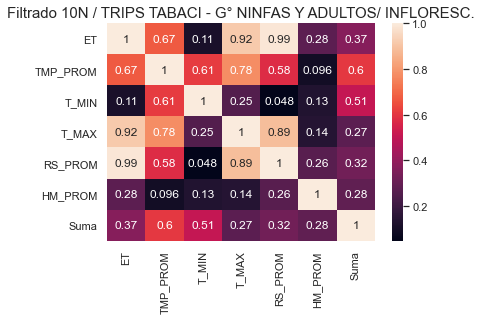

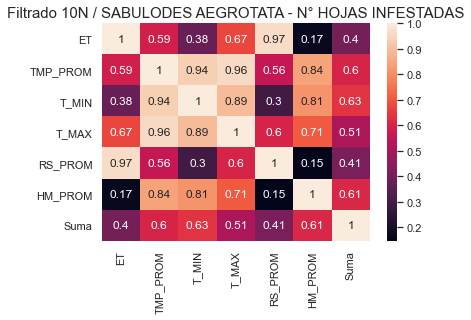

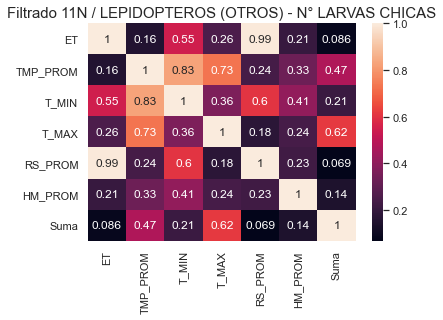

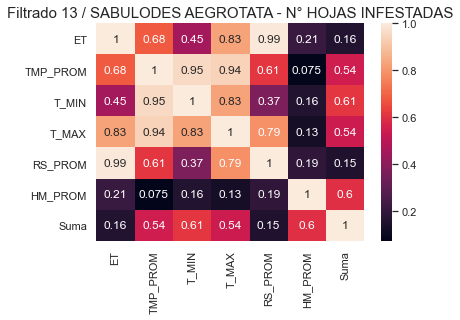

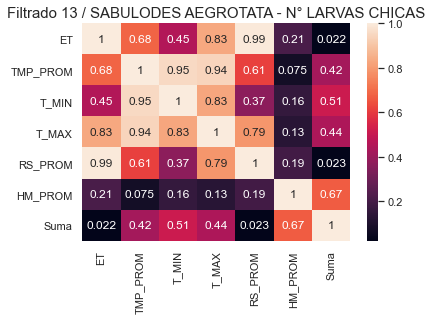

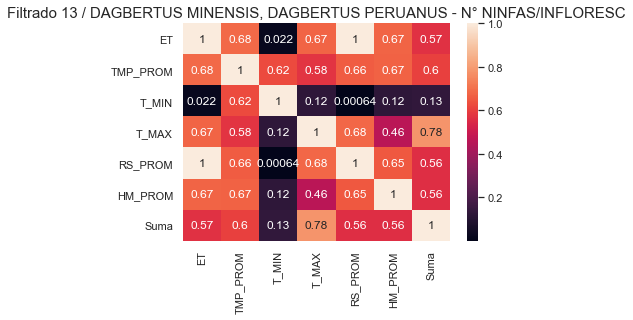

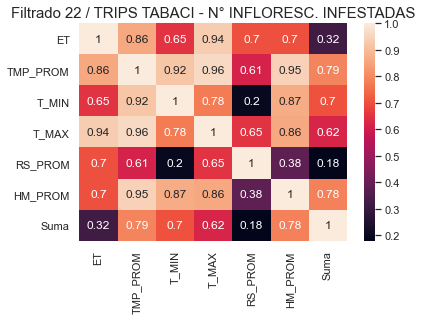

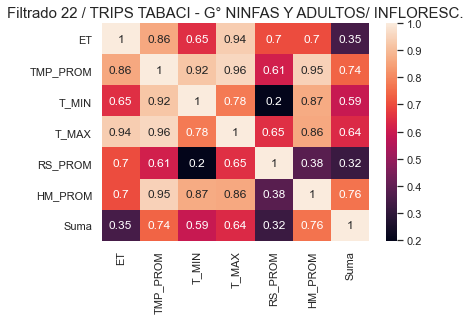

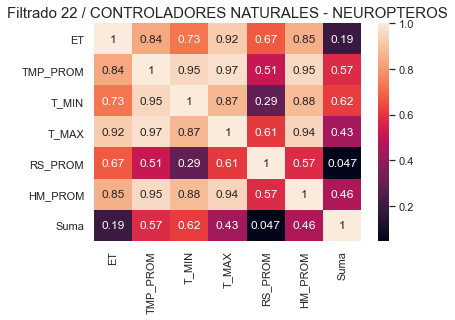

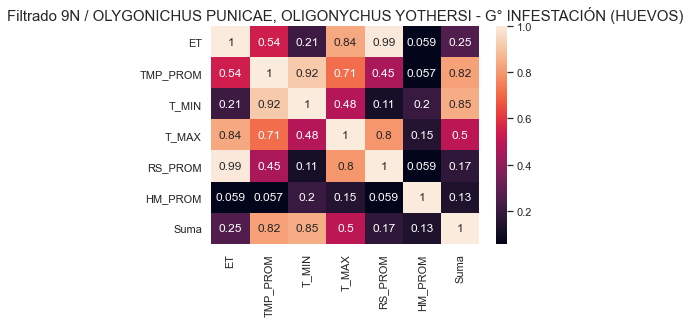

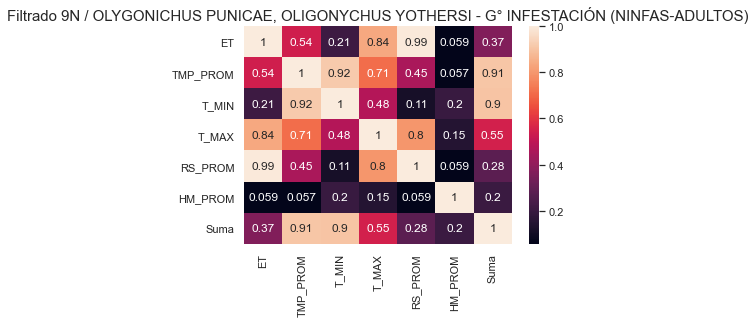

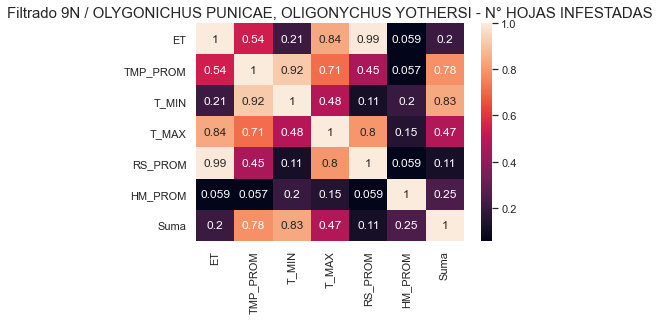

In [14]:
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrPlagaxFiltrado = dfFilter['Plagas'].unique()
    for plaga in arrPlagaxFiltrado:
        dfPlaga = dfFiltrado[dfFiltrado['Plagas'] == plaga]
        arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
        for caracteristica in arrPlagaxCarac:
            dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
            dfCarac = dfCarac.sort_values(by=['Fecha'])
            dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plagas','Caracteristica'])['Suma'].sum().reset_index()
            pathFilxPlaga = Path('output/RegresionLineal/{}/{}/{}'.format(filtrado, plaga, caracteristica))
            #pathFilxPlaga.mkdir(parents=True, exist_ok=True) 
            fl_df_weather = df_weather[df_weather['Fecha'].isin(pd.to_datetime(dfCarac['Fecha'], format='%y-/%m-/%d'))]
            fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
            fl_df_weather.reset_index(drop = True, inplace = True)
            fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
            df_union = fl_df_weather.join(dfCarac)
          
            df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Suma']]          
          
            dfCorrelacion = df_union.corr().abs()
            dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Suma'] > 0.60]

            if dfCorrelacion_index.shape[0] > 1:   
                #Creando Mapa de Calor
                sns.set()
                ax = sns.heatmap(dfCorrelacion, annot = True)

                plt.title('Filtrado {} / {} - {}'.format(filtrado,plaga,caracteristica), fontdict = { 'fontsize' : '15'})
                plt.show()
             
  


In [15]:
dfCorrelacion

,ET,TMP_PROM,T_MIN,T_MAX,RS_PROM,HM_PROM,Suma
ET,1.000000,0.540788,0.208195,0.837012,0.993693,0.058540,0.247405
TMP_PROM,0.540788,1.000000,0.917032,0.709741,0.451636,0.056719,0.050979
T_MIN,0.208195,0.917032,1.000000,0.475159,0.113171,0.198685,0.159691
T_MAX,0.837012,0.709741,0.475159,1.000000,0.795706,0.145858,0.118628
RS_PROM,0.993693,0.451636,0.113171,0.795706,1.000000,0.059062,0.273446
HM_PROM,0.058540,0.056719,0.198685,0.145858,0.059062,1.000000,0.159879
Suma,0.247405,0.050979,0.159691,0.118628,0.273446,0.159879,1.000000


In [16]:
for row in dfCorrelacion.index:
    print(row, end = " ")

ET TMP_PROM T_MIN T_MAX RS_PROM HM_PROM Suma 

In [17]:
dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Suma'] > 0.40]

if dfCorrelacion_index.shape[0] > 1:
    for row in dfCorrelacion_index.index:
        if row == 'Suma':
            print(False)
        else:
            print(True)

## Graficar Mapas de calor por Lote

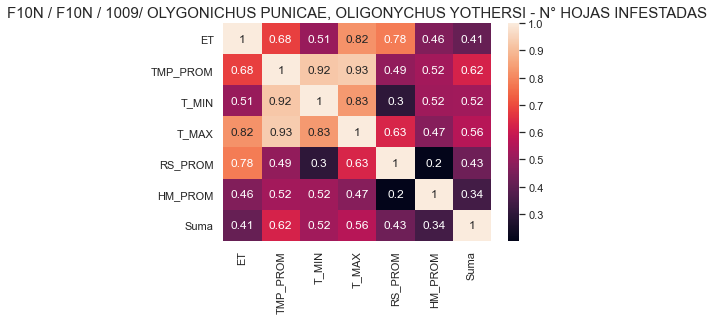

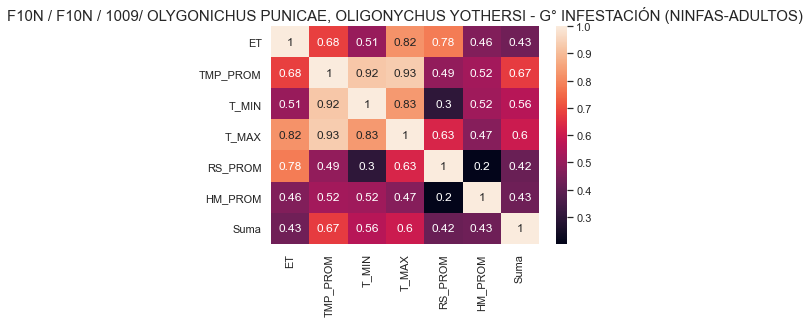

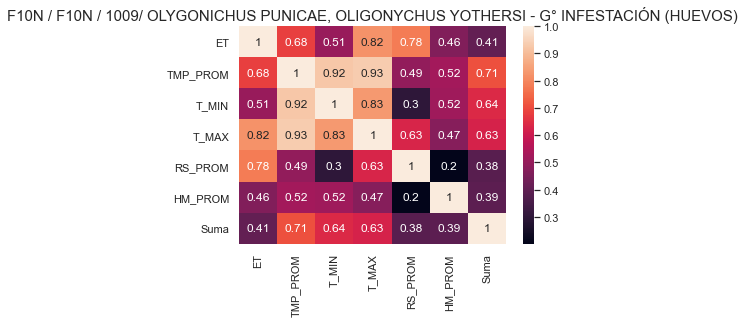

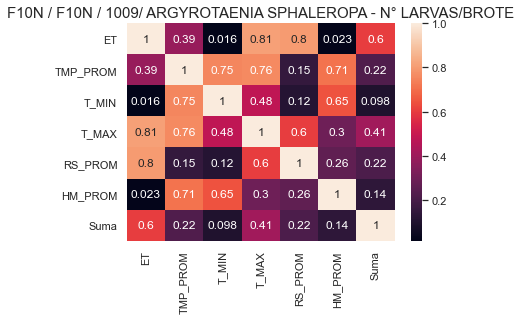

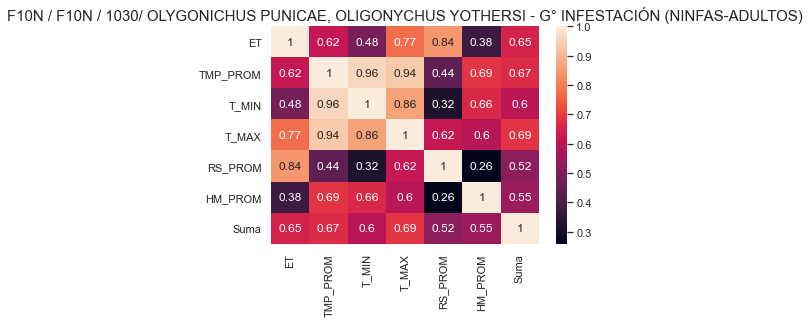

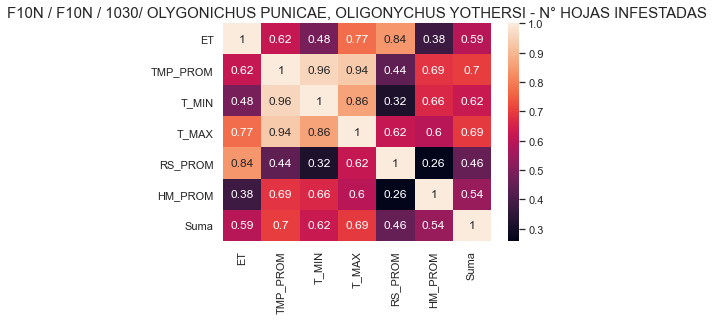

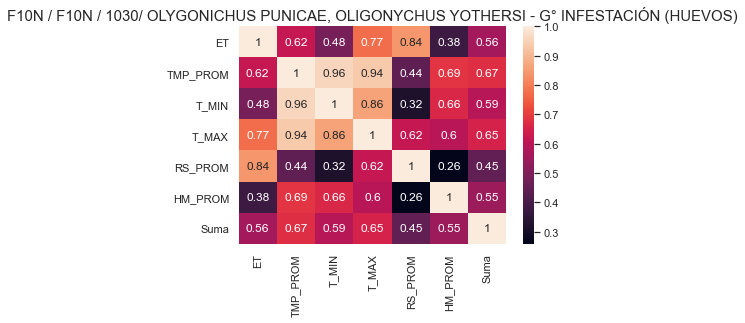

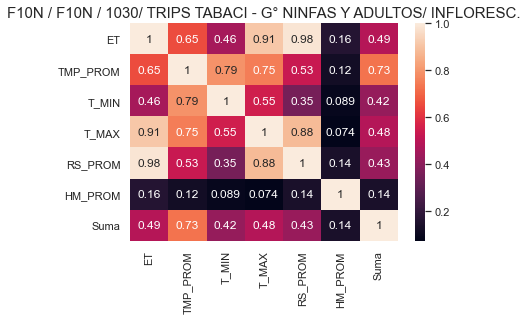

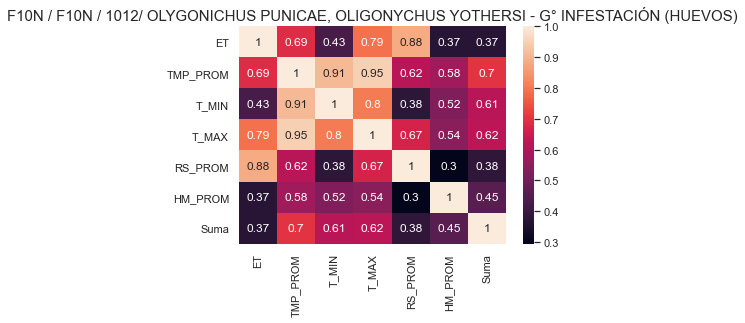

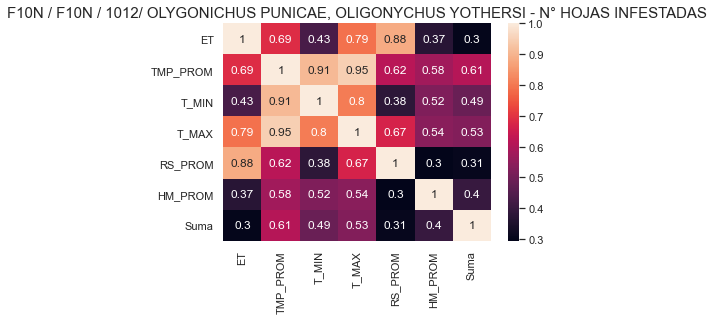

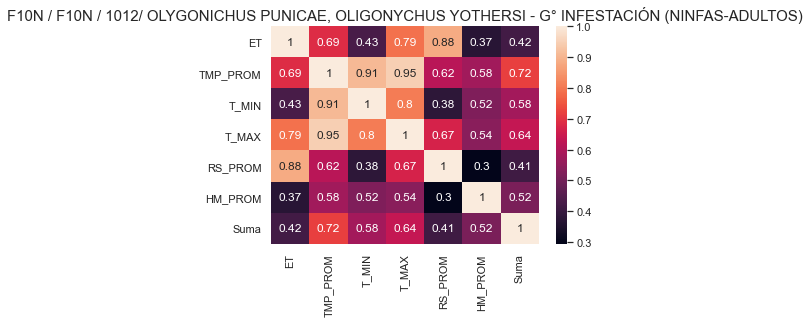

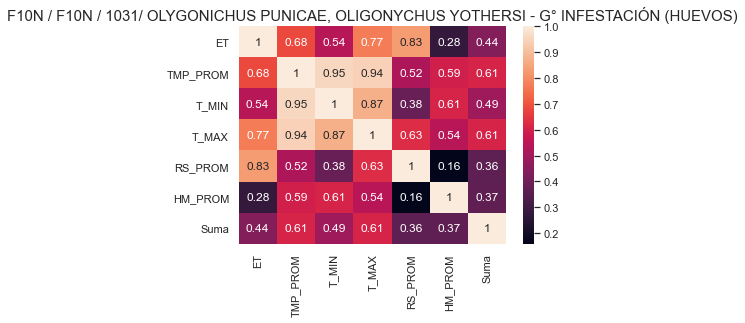

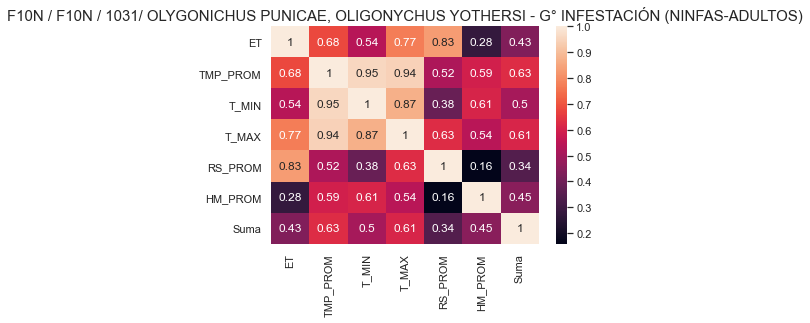

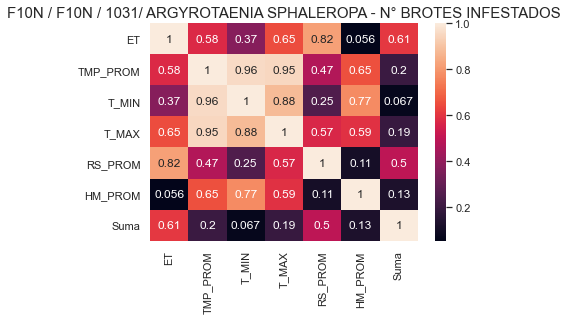

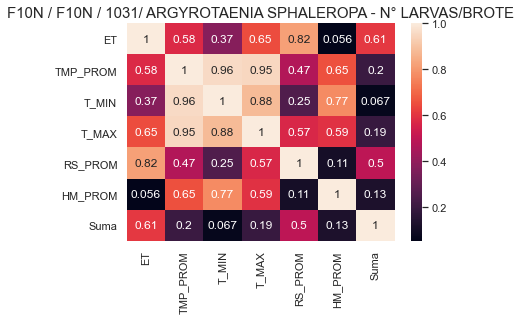

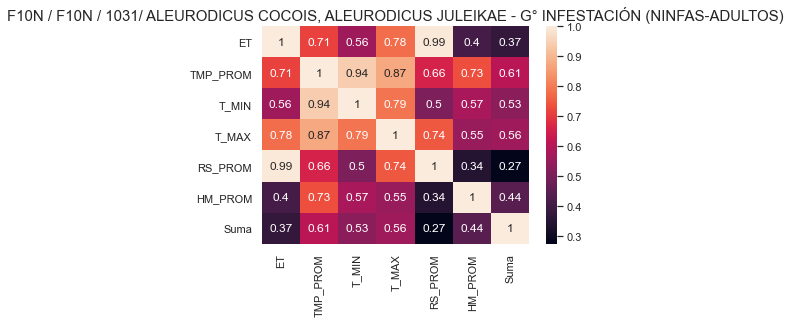

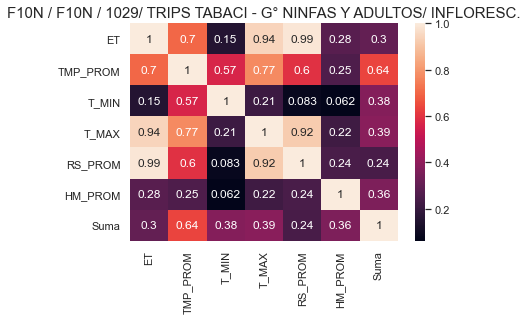

In [ ]:
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plagas'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plagas'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plagas','Caracteristica'])['Suma'].sum().reset_index()
                    pathFilxPlaga = Path('output/RegresionLineal/{}/{}/{}'.format(filtrado, plaga, caracteristica))
                    #pathFilxPlaga.mkdir(parents=True, exist_ok=True) 
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(pd.to_datetime(dfCarac['Fecha'], format='%y-/%m-/%d'))]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)

                    df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Suma']]          

                    dfCorrelacion = df_union.corr().abs()
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Suma'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                    
                        #Creando Mapa de Calor
                        sns.set()
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('F{} / {} / {}/ {} - {}'.format(filtrado,turno, lote,plaga,caracteristica), fontdict = { 'fontsize' : '15'})
                        plt.show()

In [ ]:
iContador
#dfCorrexLote

## Entrenamiento de datos por Filtrado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrPlagaxFiltrado = dfFilter['Plagas'].unique()
    for plaga in arrPlagaxFiltrado:
        dfPlaga = dfFiltrado[dfFiltrado['Plagas'] == plaga]
        arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
        for caracteristica in arrPlagaxCarac:
            dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
            dfCarac = dfCarac.sort_values(by=['Fecha'])
            dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plagas','Caracteristica'])['Suma'].sum().reset_index()
            pathFilxPlaga = Path('output/RegresionLineal/{}/{}/{}'.format(filtrado, plaga, caracteristica))
            #pathFilxPlaga.mkdir(parents=True, exist_ok=True) 
            fl_df_weather = df_weather[df_weather['Fecha'].isin(pd.to_datetime(dfCarac['Fecha'], format='%y-/%m-/%d'))]
            fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
            fl_df_weather.reset_index(drop = True, inplace = True)
            fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
            df_union = fl_df_weather.join(dfCarac)
          
            df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Suma']]          
          
            dfCorrelacion = df_union.corr().abs()           
            dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Suma'] > 0.40]
            
            if dfCorrelacion_index.shape[0] > 1: 
                #print(dfCorrelacion_index.head(10))
               # print(dfCorrelacion_index['ET']['Suma'])
                arrColumns = dfCorrelacion_index.columns
                
                arrColumnsUnion = []
                ###########################################
                for column in arrColumns:
                    if (dfCorrelacion_index[column]['Suma'] > 0.40) & (column != 'Suma'):
                            arrColumnsUnion.append(column)
                ############################################            
                #Creando regresión lineal
                df_union = df_union.drop('Fecha' ,axis=1)
                df_union = df_union.fillna(df_union.mean())
                #print(df_union[arrColumnsUnion].shape[0])
                if df_union[arrColumnsUnion].shape[0] > 0:   
                    df_union.to_excel('datasets/{}_{}.xlsx'.format(filtrado,plaga))
                    x = df_union[arrColumnsUnion]
                    y = df_union['Suma']
#                     print('F{} - {} - {}'.format(filtrado, plaga, caracteristica))
#                     print(x.shape[0])
#                     print(x)
#                     print('*************')
#                     print(y.shape[0])
#                     print(y)
#                     plt.scatter(x, y)
                    plt.title('{} - {}'.format(filtrado, plaga))
                    print('------------------------------------------------------------')
                    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
                    lrm = LinearRegression()
                    lrm.fit(X_train,y_train)
                    predicciones = lrm.predict(X_test)
                    print('{} - {} Total: {}'.format(filtrado, plaga, x.shape[0]))
                    
                    #plt.scatter(X_test, y_test,  color='black')                    
                    plt.scatter(y_test, predicciones,  color='black')
                    
                    #sns.distplot(y_test - predicciones)
                    #sns.scatterplot(y_test - predicciones)
                    #print(y_test - predicciones)
                    
                    #plt.title('{} - {}'.format(filtrado, plaga))
                    print('Coeficiente: {} '.format(lrm.coef_))
                    print('------------------------------------------------------------------')
                    plt.show()
    